In [99]:
# importing necessary libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
# reading the dataset to the python environment
data= pd.read_csv('/content/sample_data/Wholesale customers data.csv')

In [ ]:
# displaying the first 5 rows of the dataset
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [ ]:
data.dtypes # all are numerical columns

,0
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


Types of clustering

1. K-means clustering


In [ ]:
data.isna().sum() # no missing values found

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0
Cluster_labels,0


# Outliers detection

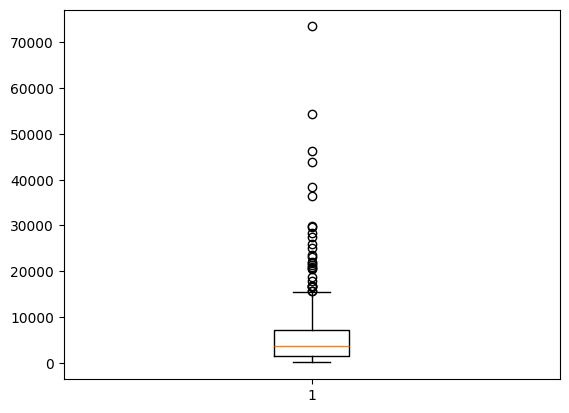

In [ ]:
plt.boxplot(data['Milk'])
plt.show()

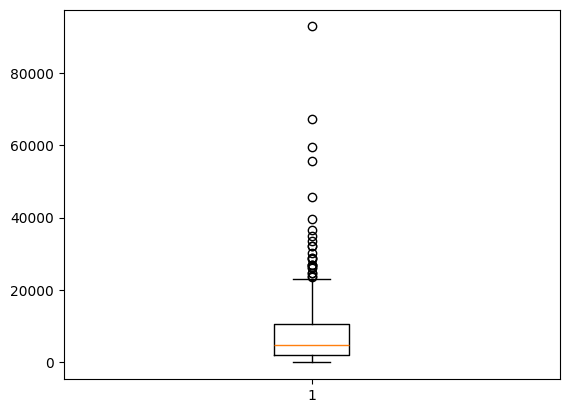

In [ ]:
plt.boxplot(data['Grocery'])
plt.show()

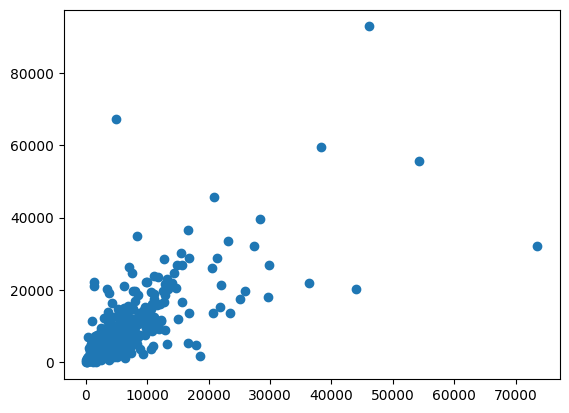

In [ ]:
plt.scatter(data['Milk'],data['Grocery'])
plt.show()

In [ ]:
data[data['Milk']>40000].index

Index([47, 85, 86, 183], dtype='int64')

In [ ]:
data[data['Grocery']>40000].index

Index([47, 61, 65, 85, 333], dtype='int64')

In [ ]:
data.drop(data[data['Milk']>30000].index,inplace=True)

In [ ]:
data.drop(data[data['Grocery']>40000].index,inplace=True)

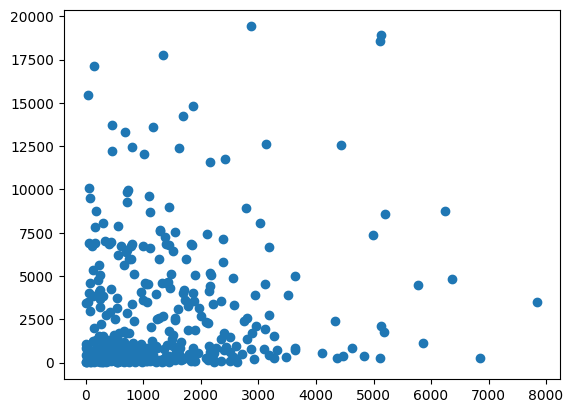

In [ ]:
plt.scatter(data['Delicassen'],data['Detergents_Paper'])
plt.show()

In [ ]:
data.drop(data[data['Delicassen']>2500].index,inplace=True)

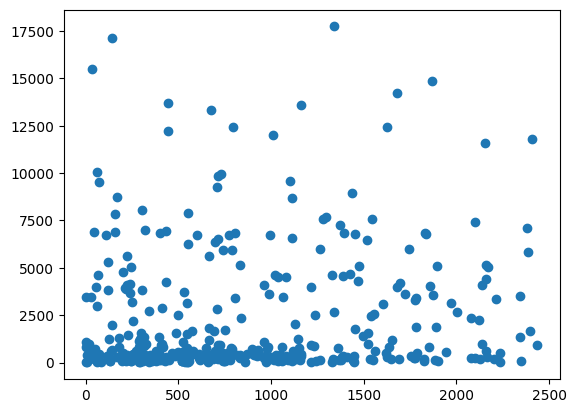

In [ ]:
plt.scatter(data['Delicassen'],data['Detergents_Paper'])
plt.show()

In [ ]:
data.drop(data[data['Delicassen']>2500].index,inplace=True)

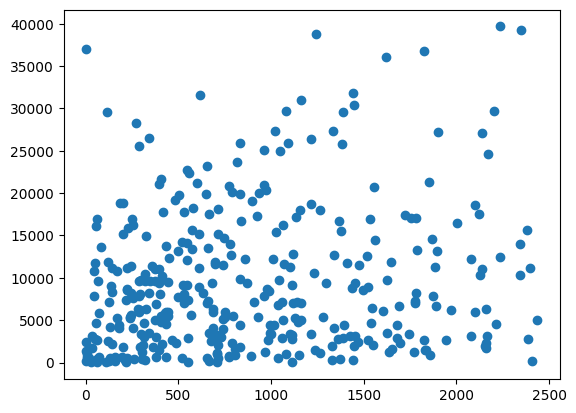

In [ ]:
plt.scatter(data['Delicassen'],data['Fresh'])
plt.show()

In [ ]:
data.drop(data[data['Fresh']>10000].index,inplace=True)

In [ ]:
data.drop(data[data['Fresh']>40000].index,inplace=True)

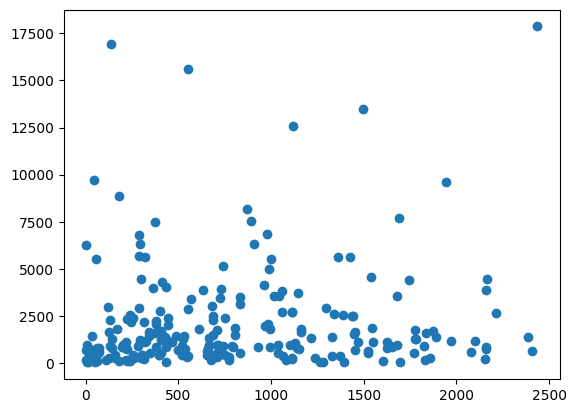

In [ ]:
plt.scatter(data['Delicassen'],data['Frozen'])
plt.show()

In [ ]:
data.drop(data[data['Frozen']>2500].index,inplace=True)

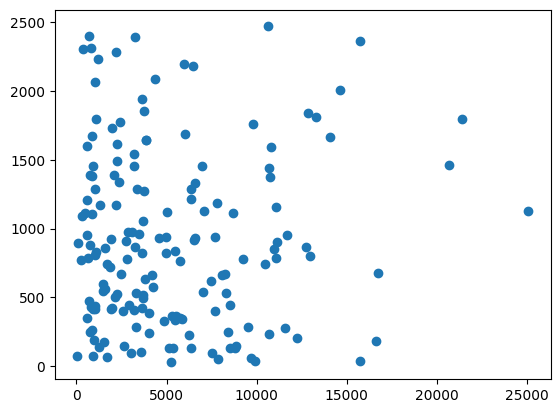

In [ ]:
plt.scatter(data['Milk'],data['Frozen'])
plt.show()

In [101]:
# taken needed columns from dataset into a variable x.
x= data[['Frozen','Milk','Grocery','Fresh','Detergents_Paper','Delicassen']]

In [102]:
x

,Frozen,Milk,Grocery,Fresh,Detergents_Paper,Delicassen
0,214,9656,7561,12669,2674,1338
1,1762,9810,9568,7057,3293,1776
2,2405,8808,7684,6353,3516,7844
3,6404,1196,4221,13265,507,1788
4,3915,5410,7198,22615,1777,5185
...,...,...,...,...,...,...
435,13135,12051,16027,29703,182,2204
436,4510,1431,764,39228,93,2346
437,437,15488,30243,14531,14841,1867
438,1038,1981,2232,10290,168,2125


In [ ]:
# step 1: Randomly initialize k points called cluster centroids.
# step 2: categorize each item to its closest mean, update the means coordinates (average of items categorized in that cluster)
# step 3: repeat the process for given no of iterations and at the end we have our clusters.

# K-Means Clustering

In [ ]:
# importing the library
from sklearn.cluster import KMeans

In [ ]:
# Elbow method: to find the ideal value of k( optimum number of clusters)

In [ ]:
# Finding optimum number of clusters
wcss= []
for k in range(1,11):
  km= KMeans(n_clusters=k,init='k-means++',random_state=21)
  km.fit(x)
  wcss.append(km.inertia_)

In [ ]:
wcss

[16420093421.867466,
 7020682010.74291,
 4828686816.64342,
 4122351168.006262,
 3536387968.5976176,
 3170969647.3153014,
 2913645004.6399713,
 2444041363.305327,
 2332238722.9546766,
 2225029683.865923]

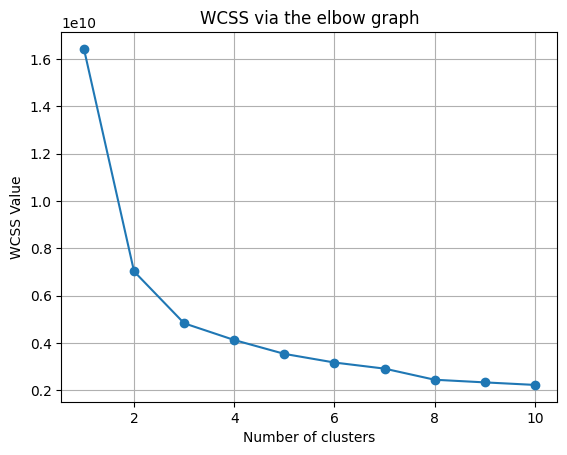

In [ ]:
# Plotting the elbow graph to find the optimum number of cluster
plt.plot(range(1,11),wcss,'o-')
plt.title('WCSS via the elbow graph')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Value')
plt.show()

In [ ]:
# re-training, k has so many values from above graph, we can take value 2 (it looks more similar to elbow)
km= KMeans(n_clusters=2,init='k-means++',random_state=42)

In [ ]:
y_means=km.fit_predict(x)

In [ ]:
y_means

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int32)

In [ ]:
cluster_labels= km.predict(x)

In [ ]:
cluster_labels

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int32)

In [ ]:
pd.Series(y_means).value_counts()

,count
1,107
0,59


# Visualizing Clusters

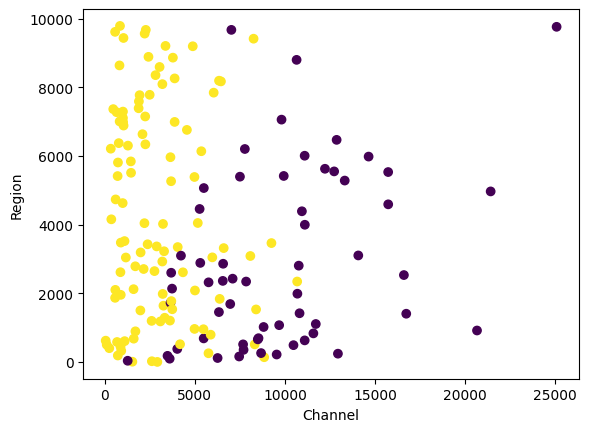

In [ ]:
plt.scatter(data['Milk'],data['Fresh'],c=cluster_labels)
plt.xlabel('Channel')
plt.ylabel('Region')
plt.show()

In [ ]:
cluster_indices= np.where(cluster_labels==0)[0]

In [ ]:
cluster_indices

array([  0,   3,   4,   8,   9,  10,  11,  12,  13,  15,  17,  25,  26,
        31,  32,  33,  35,  50,  51,  52,  53,  54,  58,  60,  61,  62,
        65,  67,  69,  73,  76,  79,  80,  81,  83,  92,  96, 104, 109,
       110, 111, 112, 113, 114, 116, 117, 119, 122, 123, 125, 129, 132,
       134, 155, 157, 158, 159, 161, 163])

In [ ]:
data['Cluster_labels']= cluster_labels

In [ ]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_labels
1,2,3,7057,9810,9568,1762,3293,1776,0
5,2,3,9413,8259,5126,666,1795,1451,1
8,1,3,5963,3648,6192,425,1716,750,1
9,2,3,6006,11093,18881,1159,7425,2098,2
16,2,3,1020,8816,12121,134,4508,1080,0
...,...,...,...,...,...,...,...,...,...
420,1,3,4456,5266,13227,25,6818,1393,0
428,1,3,3047,5970,4910,2198,850,317,1
430,1,3,3097,4230,16483,575,241,2080,0
433,1,3,1982,3218,1493,1541,356,1449,1


In [ ]:
target_cluster_data= data[data['Cluster_labels']==0]

In [ ]:
target_cluster_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_labels
1,2,3,7057,9810,9568,1762,3293,1776,0
9,2,3,6006,11093,18881,1159,7425,2098,0
16,2,3,1020,8816,12121,134,4508,1080,0
35,2,3,688,5491,11091,833,4239,436,0
38,2,3,4591,15729,16709,33,6956,433,0
43,2,3,630,11095,23998,787,9529,72,0
44,2,3,9670,7027,10471,541,4618,65,0
46,2,3,3103,14069,21955,1668,6792,1452,0
49,2,3,4967,21412,28921,1798,13583,1163,0
53,2,3,491,10473,11532,744,5611,224,0


In [ ]:
# Assuming you have assigned colors to each cluster

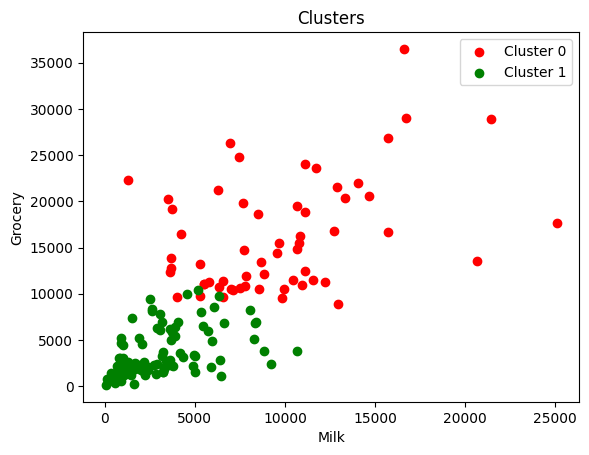

In [ ]:
colors= ['r','g']

for i in range(max(cluster_labels)+1):
  cluster_data= x[cluster_labels==i]
  plt.scatter(cluster_data['Milk'],cluster_data['Grocery'],c=colors[i],label=f'Cluster {i}')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Clusters')
plt.legend()
plt.show()

In [ ]:
# silhouette score- measures how well data points are grouped within their assigned clusters.
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_avg= silhouette_score(x,cluster_labels)

In [ ]:
silhouette_avg

0.5041634165556815

# PCA for Dimensionality reduction

In [ ]:
data.corr() # displayes the correlation matrix

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


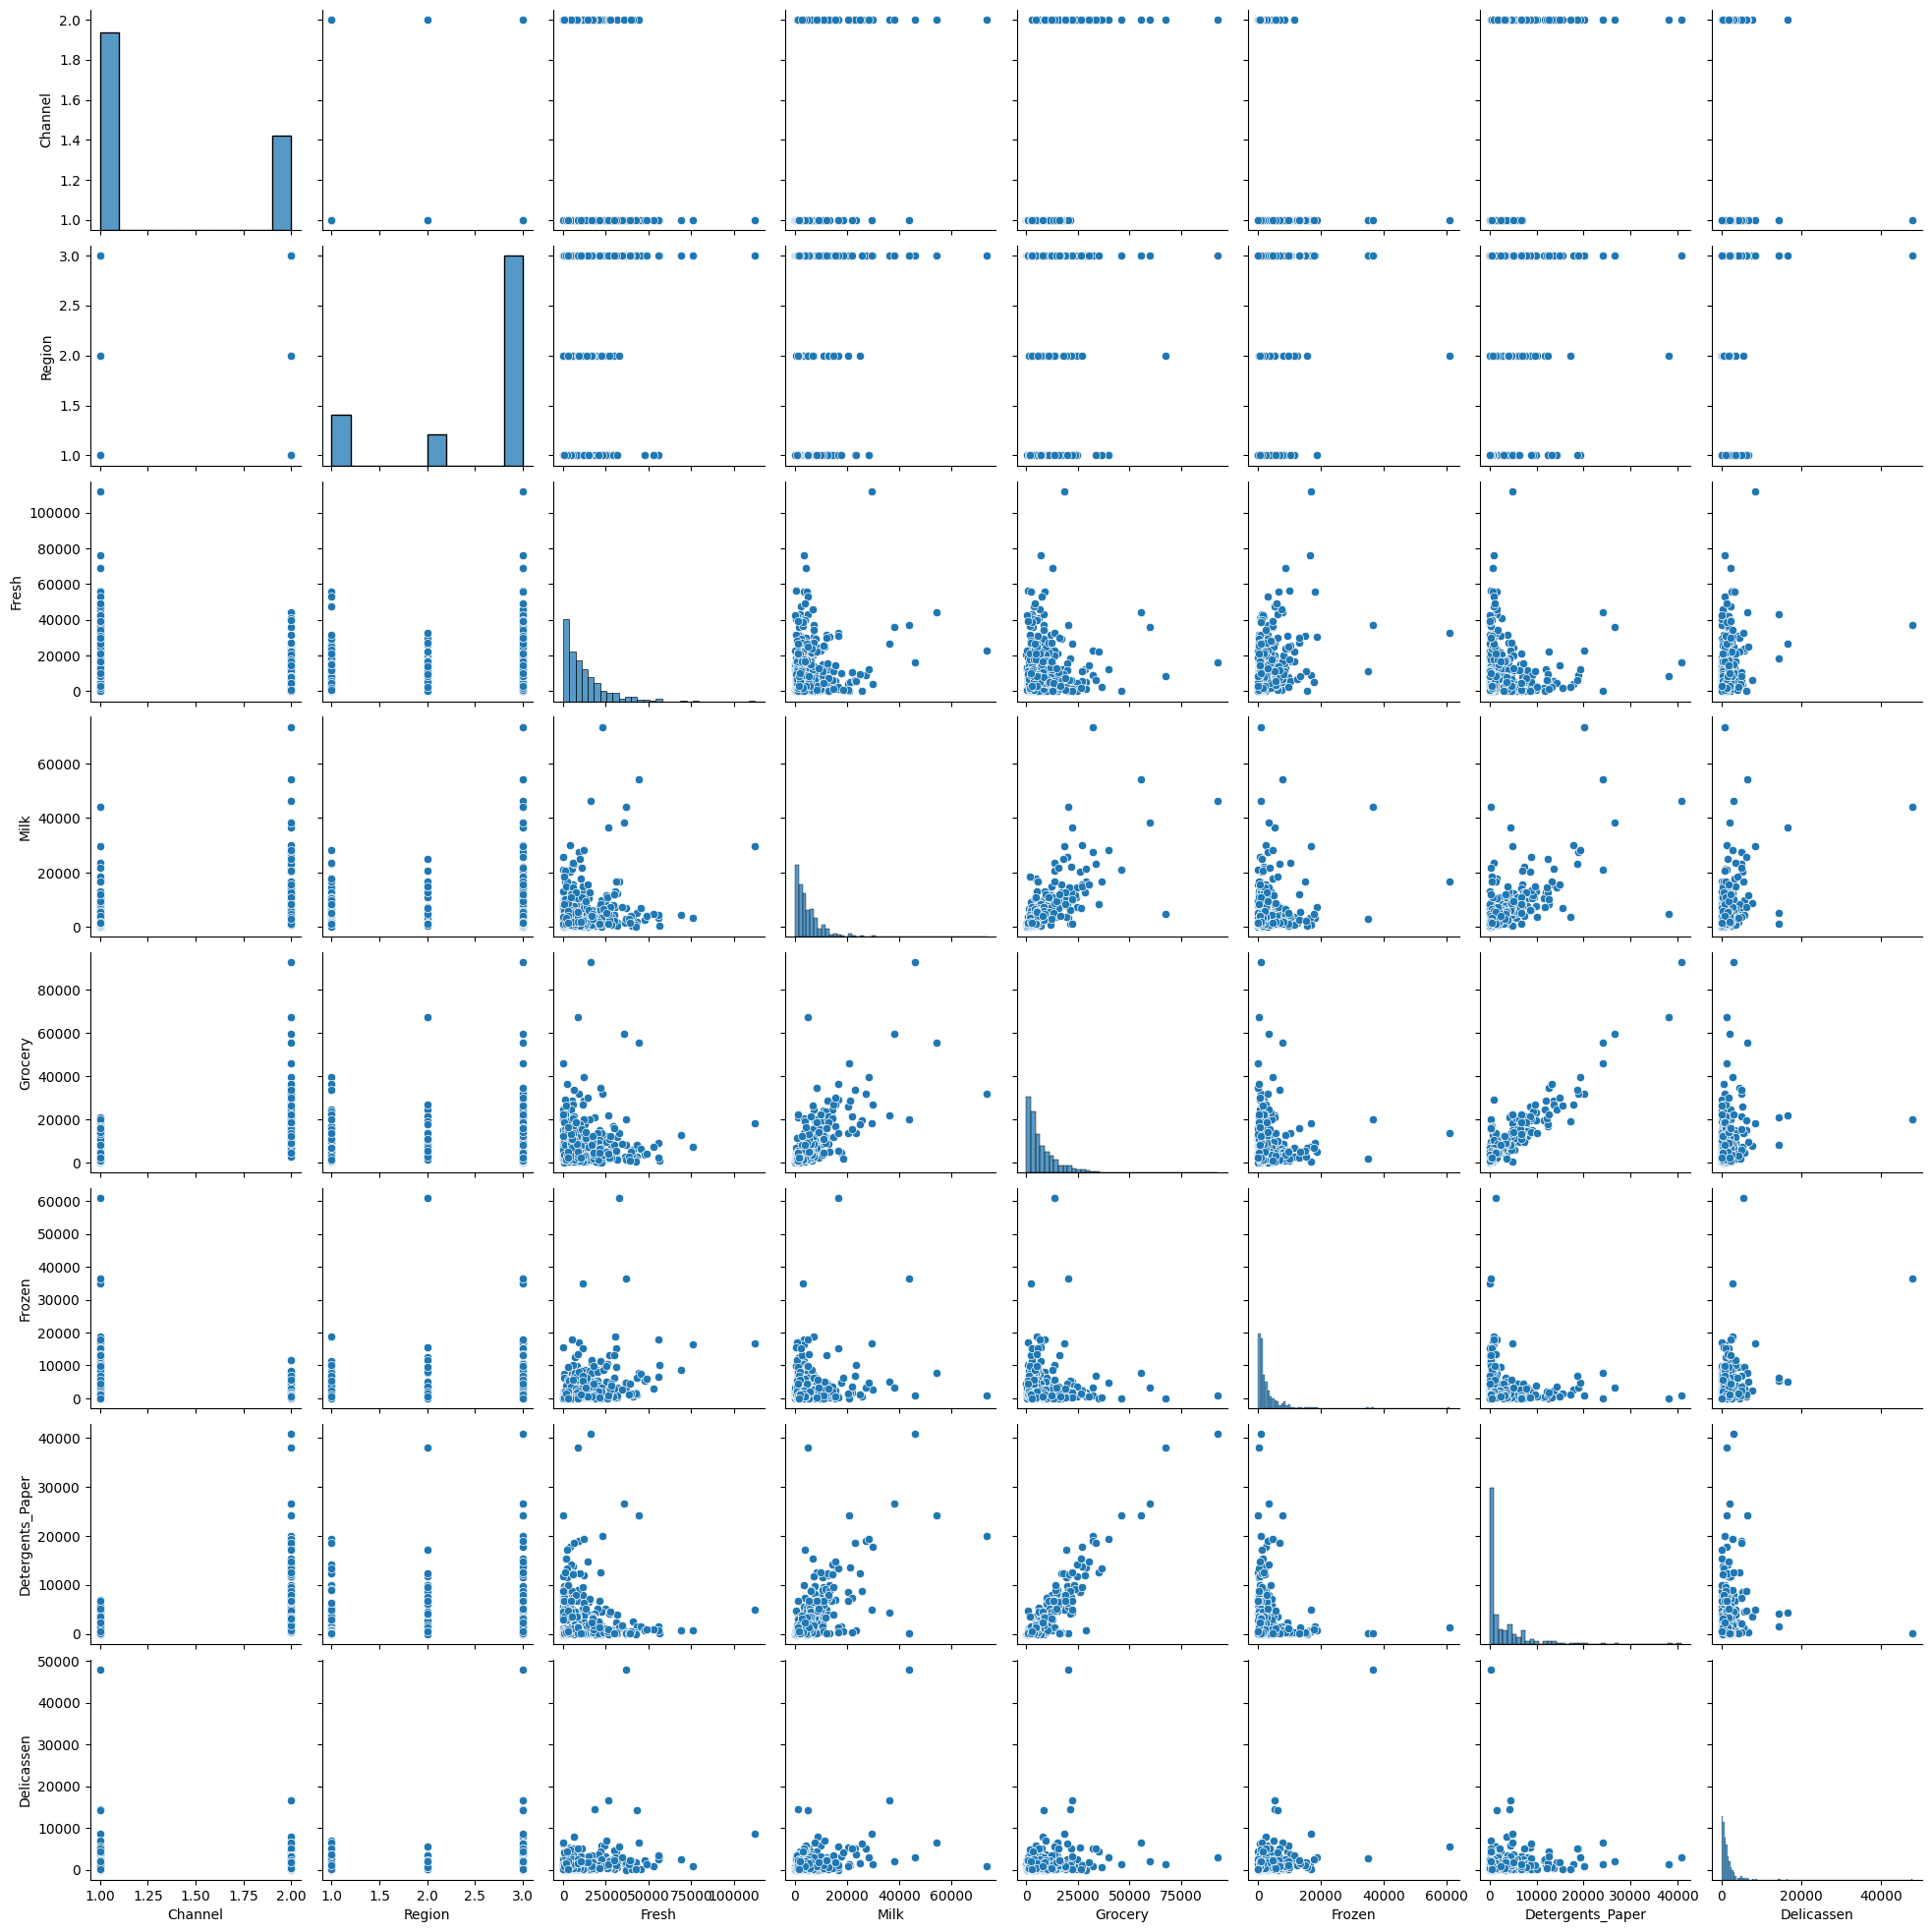

In [ ]:
sns.pairplot(data)

In [7]:
data.mean()

,0
Channel,1.322727
Region,2.543182
Fresh,12000.297727
Milk,5796.265909
Grocery,7951.277273
Frozen,3071.931818
Detergents_Paper,2881.493182
Delicassen,1524.870455


In [8]:
data.var()

,0
Channel,2.190723e-01
Region,5.994978e-01
Fresh,1.599549e+08
Milk,5.446997e+07
Grocery,9.031010e+07
Frozen,2.356785e+07
Detergents_Paper,2.273244e+07
Delicassen,7.952997e+06


In [9]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [10]:
data.index

RangeIndex(start=0, stop=440, step=1)

In [131]:
# scaling is a mandaatory step in unsupervised learning
from sklearn.preprocessing import scale
scale(data)

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [132]:
x= pd.DataFrame(scale(data),index= data.index,columns=data.columns) # converted to dataframe

In [133]:
x

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [134]:
# importing pca
from sklearn.decomposition import PCA

In [135]:
pc=PCA()

In [136]:
pc_array= pc.fit_transform(x)

In [137]:
pc_array.shape

(440, 8)

In [138]:
pc_array= pd.DataFrame(pc_array,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']) # from the above, dimension=8.

In [20]:
# PC1 explains more variance, and reduces with p2,3,4 and so on.

In [139]:
pc_array.corr().round() # diagonal elements 1, rest are 0.

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
PC1,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
PC2,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0
PC3,-0.0,0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0
PC4,-0.0,-0.0,-0.0,1.0,0.0,0.0,0.0,0.0
PC5,-0.0,-0.0,0.0,0.0,1.0,0.0,0.0,-0.0
PC6,-0.0,0.0,-0.0,0.0,0.0,1.0,-0.0,-0.0
PC7,0.0,0.0,0.0,0.0,0.0,-0.0,1.0,0.0
PC8,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,1.0


In [22]:
pc.explained_variance_

array([3.10707136, 1.79404441, 1.0140786 , 0.74007428, 0.55790035,
       0.46035462, 0.28176643, 0.06293318])

In [24]:
pc.explained_variance_ratio_*100

array([38.75012291, 22.37458795, 12.64717345,  9.22990372,  6.95790497,
        5.74135444,  3.51407568,  0.78487688])

In [27]:
38.75+22.37+12.64+9.22+6.95+5.74+3.51+0.78 # sum total of all values is near to 100.

99.96000000000001

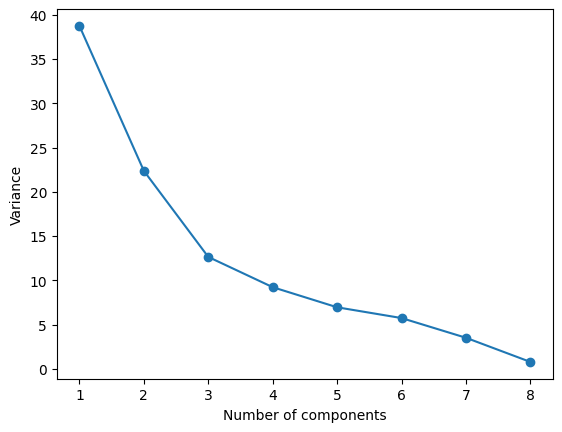

In [28]:
plt.plot([1,2,3,4,5,6,7,8],pc.explained_variance_ratio_*100,'o-')
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.show()

# Clustering from dimensionality reduced feature values
 1. K-Means Clustering

In [34]:
from sklearn.cluster import KMeans

In [35]:
wcss1= []
for i in range(1,11):
  km1= KMeans(n_clusters=i,init='k-means++',random_state=42)
  km1.fit(pc_array)
  css1=km1.inertia_
  wcss1.append(css1)

In [36]:
wcss1

[3520.0000000000036,
 2600.3756482224453,
 2149.2839562217605,
 1851.8408722743884,
 1567.4493550056081,
 1446.4349586356489,
 1189.4373315151015,
 1146.393822278173,
 1082.6398816370174,
 969.1934595642875]

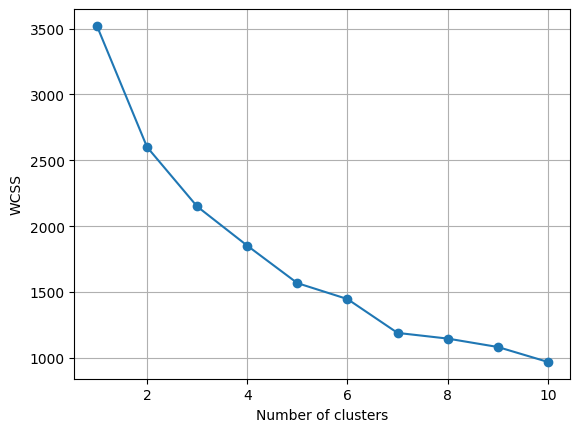

In [37]:
plt.plot([1,2,3,4,5,6,7,8,9,10],wcss1,'o-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [39]:
km1= KMeans(n_clusters=3,init='k-means++',random_state=42)

In [41]:
km1.fit(pc_array)

KMeans(n_clusters=3, random_state=42)

In [42]:
cluster_labels1= km1.predict(pc_array)

In [43]:
cluster_labels1

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [44]:
pd.Series(cluster_labels1).value_counts()

,count
1,297
0,130
2,13


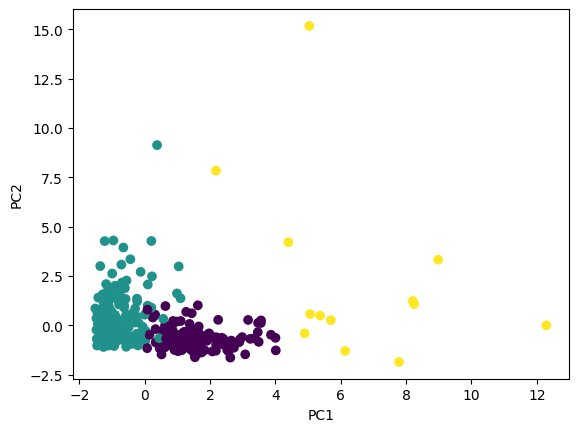

In [45]:
plt.scatter(pc_array['PC1'],pc_array['PC2'],c=cluster_labels1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [46]:
cluster_indices1= np.where(cluster_labels1==0)[0]

In [47]:
cluster_indices1

array([  0,   1,   2,   4,   5,   6,   7,   9,  10,  11,  12,  13,  14,
        16,  18,  20,  24,  25,  28,  35,  37,  38,  42,  43,  44,  45,
        46,  48,  49,  52,  53,  57,  60,  62,  63,  67,  73,  74,  77,
        81,  82,  84,  94,  96, 100, 101, 102, 106, 107, 108, 109, 111,
       123, 127, 145, 155, 156, 158, 159, 160, 163, 164, 165, 166, 170,
       171, 173, 175, 188, 189, 193, 197, 200, 201, 205, 207, 209, 214,
       216, 218, 223, 226, 230, 245, 264, 266, 268, 279, 281, 293, 295,
       297, 298, 300, 301, 302, 303, 304, 305, 306, 309, 312, 315, 319,
       331, 335, 340, 341, 343, 346, 347, 349, 351, 353, 357, 365, 370,
       373, 376, 379, 396, 407, 408, 415, 416, 418, 421, 423, 424, 437])

# Hierarchial clustering

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [50]:
mergins= linkage(pc_array,method='ward')

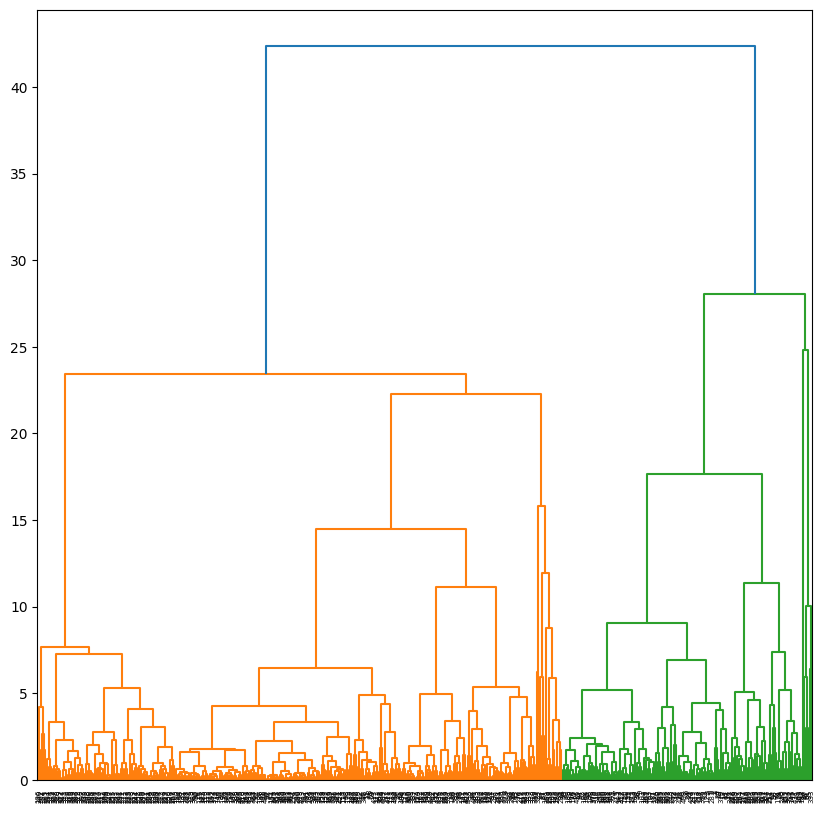

In [52]:
plt.figure(figsize=(10,10))
dendrogram(mergins)
plt.axhline(y=100,color='r',linestyle='--')
plt.show()

Agglomerative Clustering

In [53]:
from sklearn.cluster import AgglomerativeClustering

In [56]:
hc= AgglomerativeClustering(n_clusters=3,linkage='ward')

In [57]:
yhc= hc.fit_predict(pc_array)

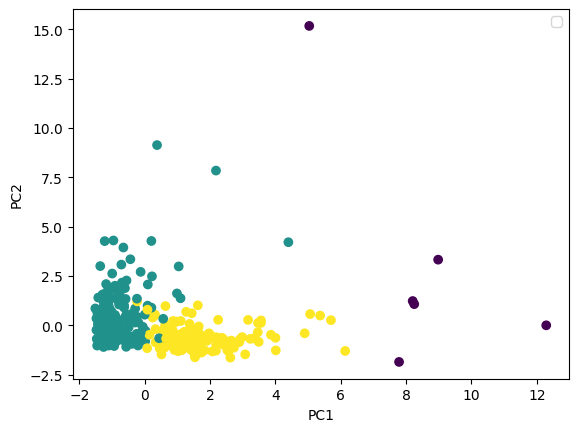

In [59]:
plt.scatter(pc_array['PC1'],pc_array['PC2'],c=yhc)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# DBSCAN Clustering

In [60]:
# DBSCAN ( Density-Based Spatial Clustering of Applications with Noise)
# Advantages over other clustering techniques: flexibility in cluster shape, no pre-defined number of clusters, noise handling.

In [111]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [140]:
db= DBSCAN(eps=1,min_samples=5).fit(pc_array)

In [81]:
core_sample_mask= np.zeros_like(db.labels_,dtype=bool)
core_sample_mask[db.core_sample_indices_]= True
labels= db.labels_
n_clusters= len(set(labels))-(1 if -1 in labels else 0)
unique_labels= set(labels)
colors=['y','b','g','r']
for k,col in zip(unique_labels,colors):
  if k== -1:
    col= 'k'

    class_member_mask= (labels==k)

    xy= pc_array[class_member_mask & core_sample_mask]
    plt.plot(xy[:,0],xy[:,1],markerfacecolor=col,markeredgecolor='k',markersize=14)

    xy= pc_array[class_member_mask & ~core_sample_mask]
    plt.plot(xy[:,0],xy[:,1],markerfacecolor=col,markeredgecolor='k',markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters)

plt.show()

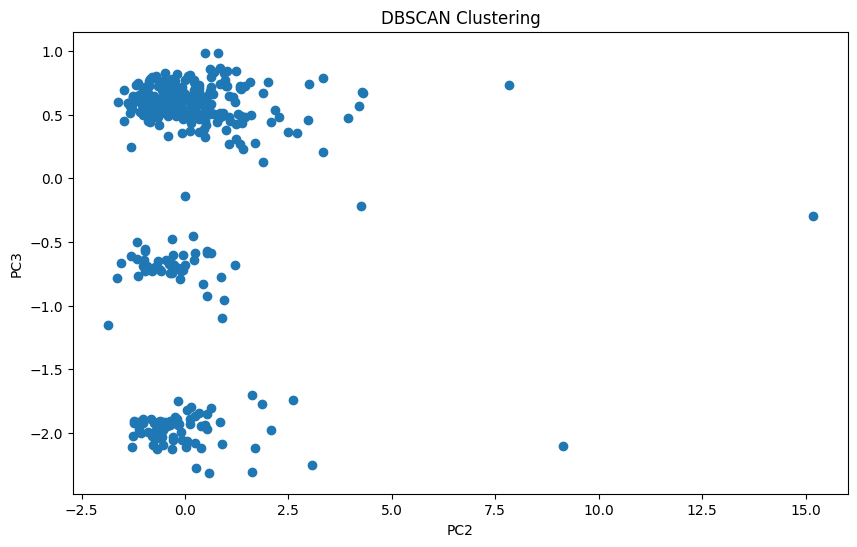

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(pc_array['PC2'],pc_array['PC3'])
plt.title('DBSCAN Clustering')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

In [142]:
# function to plot k-distance graph

def plot_k_distance_graph(pc_array,k):
  neigh= NearestNeighbors(n_neighbors=k)
  neigh.fit(pc_array)
  distances= neigh.kneighbors(pc_array)
  distances= np.sort(distances[:,k-1])
  plt.figure(figsize=(10,6))
  plt.plot(distances)
  plt.show()
  plot_k_distance_graph(pc_array,k=5)

In [143]:
# perform DBSCAN clustering
epsilon= 0.15
min_samples=5
dbscan= DBSCAN(eps=epsilon,min_samples=min_samples)
clusters= dbscan.fit_predict(pc_array)

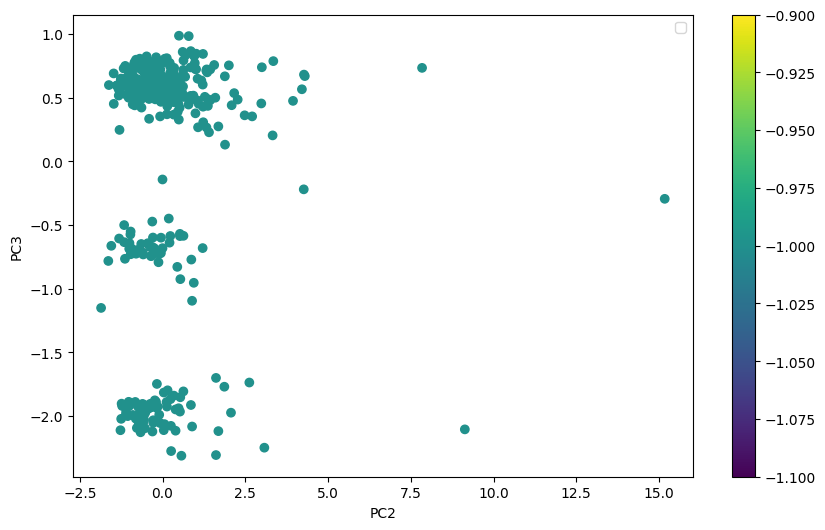

In [144]:
plt.figure(figsize=(10,6))
scatter= plt.scatter(pc_array['PC2'],pc_array['PC3'],c=clusters,cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.legend()
plt.show()